In [1]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


## Спецификация 
- 'churn' - *факт оттока в текущем месяце (целевая переменная)*
- 'gender' - пол
- 'near_location' - проживание или работа в районе, где находится фитнес-центр
- 'partner' - сотрудник компании-партёра клуба
- 'promo_friends' - факт первоначальной записи в рамках акции "приведи друга"
- 'phone' - наличие контактного телефона
- 'age' - возраст
- 'lifetime' - время с первого обращения в фитнесс-центр
- 'contract_period' - длительность текущего действующего аобнемента (месяц, 3 месяца, 6 месяцев, 1 год)
- 'month_to_end_contract' - срок до окончания текущего действующего абонемента (в месяцах)
- 'group_visits' - факт посещения групповых занятий
- 'avg_class_frequency_total' - средняя частота посещений в неделю за все время с начала действия абонемента
- 'avg_class_frequency_current_month' - средняя частота посещений в неделю за предыдущий месяц
- 'avg_additional_charges_total' - суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

## Предварительный анализ 
### Загрузим необходимые библиотеки 

In [47]:
from io import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.datasets import load_iris, load_wine, load_boston
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.svm import NuSVR
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
df = pd.read_csv('gym.csv')

In [5]:
df.head()

,Unnamed: 0,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Изучим полученные данные

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         4000 non-null   int64  
 1   gender                             4000 non-null   int64  
 2   Near_Location                      4000 non-null   int64  
 3   Partner                            4000 non-null   int64  
 4   Promo_friends                      4000 non-null   int64  
 5   Phone                              4000 non-null   int64  
 6   Contract_period                    4000 non-null   int64  
 7   Group_visits                       4000 non-null   int64  
 8   Age                                4000 non-null   int64  
 9   Avg_additional_charges_total       4000 non-null   float64
 10  Month_to_end_contract              4000 non-null   float64
 11  Lifetime                           4000 non-null   int64

In [7]:
print('Отток:')
print(df[df['Churn']==1].describe().T)
print('\nОставшиеся клиенты:')
print(df[df['Churn']==0].describe().T)

Отток:
                                    count         mean          std  \
Unnamed: 0                         1061.0  2018.887842  1158.746899   
gender                             1061.0     0.510839     0.500118   
Near_Location                      1061.0     0.768143     0.422217   
Partner                            1061.0     0.355325     0.478837   
Promo_friends                      1061.0     0.183789     0.387495   
Phone                              1061.0     0.902922     0.296204   
Contract_period                    1061.0     1.728558     2.132371   
Group_visits                       1061.0     0.268615     0.443448   
Age                                1061.0    26.989632     2.895163   
Avg_additional_charges_total       1061.0   115.082899    77.696419   
Month_to_end_contract              1061.0     1.662582     1.964593   
Lifetime                           1061.0     0.990575     1.110799   
Avg_class_frequency_total          1061.0     1.474995     0.694705   

### Вывод на основе отличий признаков у клиентов, попавших в отток и оставшихся:

- Распределение по полу не отличается
- Ближе живущие или работающие клиенты реже попадают в отток, что вполне логично
- Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты
- Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток
- Наличие мобильного номера клиента не отличается в группах
- Средняя длительность договора полне логично больше у оставшихся пользователей, у большей части клиентов в оттоке срок договора составляет 1 месяц (скорее это говорит о том, что чаще клиенты заключают договор на 1 месяц).
- Оставшиеся пользователи чаще ходят на групповые занятия (хотя возможно, что в отток попали те, кто еще не успел начать ходить на них)
- У групп есть разница в среднем возрасте клиентов
- Есть небольшое различие в выручке от других услуг фитнес-центра
- Оставшееся время до окончания срока действия договора логично больше у оставшихся клиентов.
- У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
- Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

## С использованием метода train_test_split разделим выборку на обучающую и тестовую.
### Построим модель бинарной классификации пользователей, где целевой признак - факт оттока пользователя в следующем месяце.

In [8]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

### Логическая регрессия

- Линейная регрессия предсказывает непрерывную величину, например, курс валюты, стоимость недвижимости и прочее.
- Логистическая регрессия используется для предсказания бинарной величины (да/нет), например, как в нашей задаче произойдет отток клиентов или нет 

In [9]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
print('Метрики для модели логистической регрессии:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, lr_predictions),
    precision_score(y_test, lr_predictions),
    recall_score(y_test, lr_predictions)
))

Метрики для модели логистической регрессии:
accuracy_score: 0.92375
precision_score: 0.8586387434554974
recall_score:0.8282828282828283


In [10]:
features = pd.DataFrame(lr_model.coef_.T, X.columns).reset_index()
features.columns = ['feature', 'coef']
features['coef'] = features['coef'].apply(lambda x: abs(x))
features = features.sort_values(by='coef', ascending=False)
print('\nКоэффициенты признаков в оптимальной функции логистической регрессии:')
print(features)


Коэффициенты признаков в оптимальной функции логистической регрессии:
                              feature      coef
13  Avg_class_frequency_current_month  4.464397
11                           Lifetime  3.847031
12          Avg_class_frequency_total  3.310909
8                                 Age  1.091190
6                     Contract_period  0.719265
9        Avg_additional_charges_total  0.554970
10              Month_to_end_contract  0.530538
7                        Group_visits  0.394999
4                       Promo_friends  0.278891
3                             Partner  0.079610
2                       Near_Location  0.073833
0                          Unnamed: 0  0.053905
1                              gender  0.012632
5                               Phone  0.006023


## SVM

In [11]:
# SVM
scaler = StandardScaler().fit(X_train)
x_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
x_train_scaled.describe()

,Unnamed: 0,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
count,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03
mean,-3.629042e-17,-2.720046e-17,6.068063e-17,-4.127254e-16,3.320261e-16,-7.208470e-16,5.218048e-17,-4.921064e-16,3.892026e-16,5.669076e-17,-9.547918e-17,-1.135550e-16,-1.316655e-17,-1.426637e-16
std,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00
min,-1.747211e+00,-1.015114e+00,-2.395171e+00,-9.692234e-01,-6.756712e-01,-3.161734e+00,-8.129907e-01,-8.476923e-01,-3.437389e+00,-1.512629e+00,-7.956825e-01,-9.855541e-01,-1.932126e+00,-1.670535e+00
25%,-8.567368e-01,-1.015114e+00,4.175068e-01,-9.692234e-01,-6.756712e-01,3.162821e-01,-8.129907e-01,-8.476923e-01,-6.565017e-01,-8.057932e-01,-7.956825e-01,-7.214411e-01,-7.195141e-01,-7.684193e-01
50%,6.519114e-04,9.851108e-01,4.175068e-01,-9.692234e-01,-6.756712e-01,3.162821e-01,-8.129907e-01,-8.476923e-01,-3.852687e-02,-1.209856e-01,-7.956825e-01,-1.932151e-01,-4.962701e-02,-4.837989e-02
75%,8.615233e-01,9.851108e-01,4.175068e-01,1.031754e+00,1.480010e+00,3.162821e-01,2.861095e-01,1.179673e+00,5.794480e-01,6.555996e-01,3.980277e-01,3.350108e-01,6.715123e-01,7.034534e-01
max,1.733713e+00,9.851108e-01,4.175068e-01,1.031754e+00,1.480010e+00,3.162821e-01,1.605030e+00,1.179673e+00,3.669322e+00,4.169599e+00,1.830480e+00,7.201948e+00,3.624725e+00,3.412100e+00


In [12]:
nusvr_05 = NuSVR(nu=0.7, gamma = 'scale')
nusvr_05.fit(X_train, y_train)

NuSVR(nu=0.7)

## Дерево решений

In [53]:
dt_none = DecisionTreeRegressor(max_depth=3)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'X[11] <= 1.5\nsquared_error = 0.197\nsamples = 3200\nvalue = 0.27'),
 Text(0.25, 0.625, 'X[10] <= 1.5\nsquared_error = 0.235\nsamples = 1075\nvalue = 0.624'),
 Text(0.125, 0.375, 'X[13] <= 2.151\nsquared_error = 0.176\nsamples = 755\nvalue = 0.772'),
 Text(0.0625, 0.125, 'squared_error = 0.12\nsamples = 625\nvalue = 0.861'),
 Text(0.1875, 0.125, 'squared_error = 0.226\nsamples = 130\nvalue = 0.346'),
 Text(0.375, 0.375, 'X[8] <= 28.5\nsquared_error = 0.199\nsamples = 320\nvalue = 0.275'),
 Text(0.3125, 0.125, 'squared_error = 0.249\nsamples = 143\nvalue = 0.476'),
 Text(0.4375, 0.125, 'squared_error = 0.1\nsamples = 177\nvalue = 0.113'),
 Text(0.75, 0.625, 'X[11] <= 2.5\nsquared_error = 0.082\nsamples = 2125\nvalue = 0.09'),
 Text(0.625, 0.375, 'X[13] <= 0.985\nsquared_error = 0.195\nsamples = 485\nvalue = 0.266'),
 Text(0.5625, 0.125, 'squared_error = 0.244\nsamples = 135\nvalue = 0.578'),
 Text(0.6875, 0.125, 'squared_error = 0.124\nsamples = 350\nvalue = 0.146'),


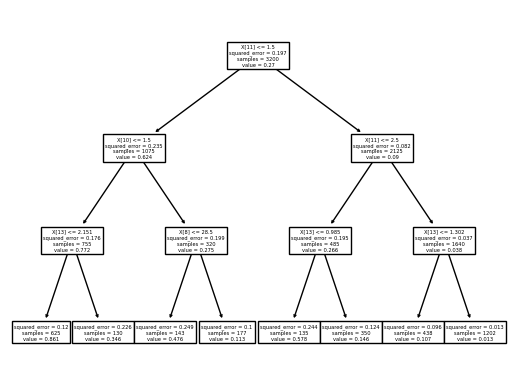

In [54]:
tree.plot_tree(dt_none)

In [22]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [19]:
def test_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
          median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:",
          r2_score(y_test, model.predict(X_test)))

In [17]:
test_model(dt_none)

mean_absolute_error: 0.10875
median_absolute_error: 0.0
r2_score: 0.4160877881808114


In [21]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(dt_none, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

In [25]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [56]:
dot_data = export_graphviz(clf, out_file=None,  
                           filled=True, rounded=True, special_characters=True,max_depth=3)  
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Важность признаков

In [41]:
list(zip(X_train.columns.values, clf.feature_importances_))

[('Unnamed: 0', 0.03890444087977608),
 ('gender', 0.00583693983884679),
 ('Near_Location', 0.0012667344323994687),
 ('Partner', 0.002845916239263289),
 ('Promo_friends', 0.002961742125806938),
 ('Phone', 0.0007880349584736334),
 ('Contract_period', 0.08862262628999662),
 ('Group_visits', 0.008962379294846418),
 ('Age', 0.07710914767980905),
 ('Avg_additional_charges_total', 0.08100038165972405),
 ('Month_to_end_contract', 0.020922651769533434),
 ('Lifetime', 0.3659062244517595),
 ('Avg_class_frequency_total', 0.14481449149670683),
 ('Avg_class_frequency_current_month', 0.1600582888830579)]

In [42]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

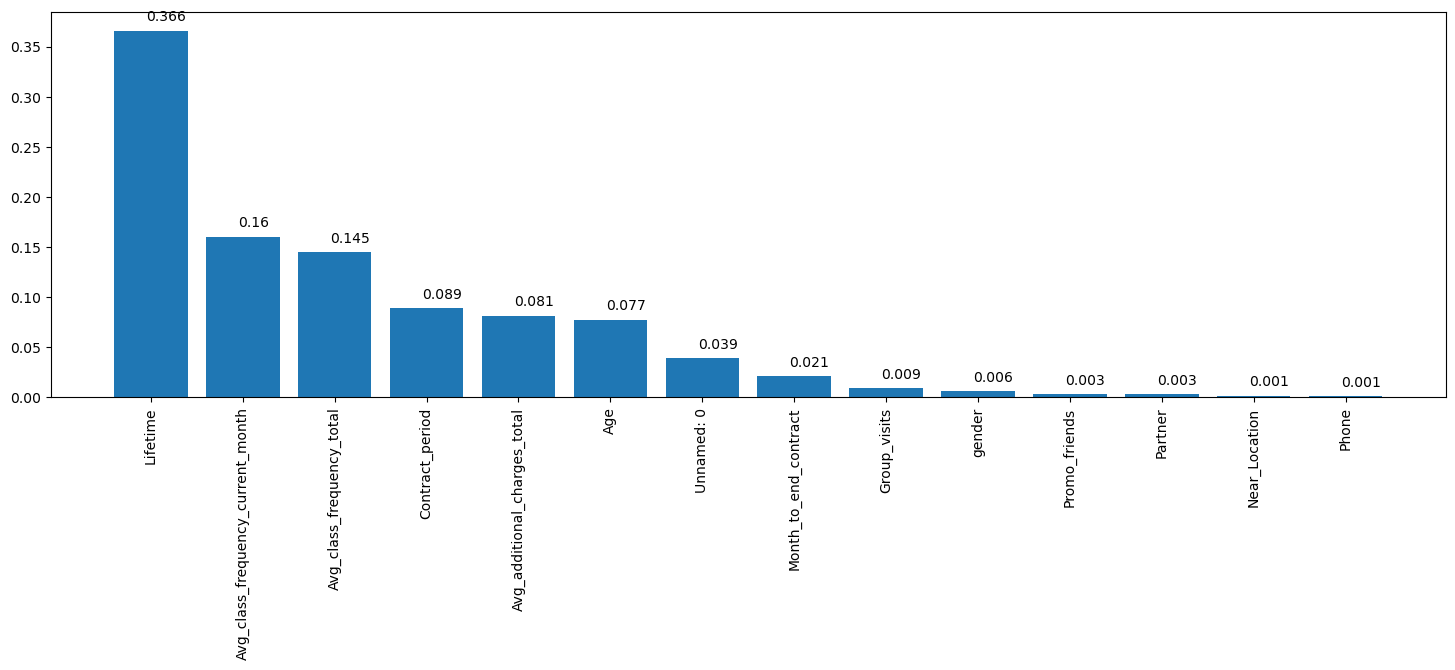

In [43]:
dt_fl, dt_fd = draw_feature_importances(clf, X_train)